# WINE QUALITY ASSESSMENT MODEL USING LINEAR REGRESSION MODEL

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import seaborn as sns

df = pd.read_csv("winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Print the information and meaning of attributes

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 2, 3. Using all 11 attributes to find the correlation between them and quality attribute

In [76]:
corr = df.corr()["quality"]
print(corr)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


<Axes: >

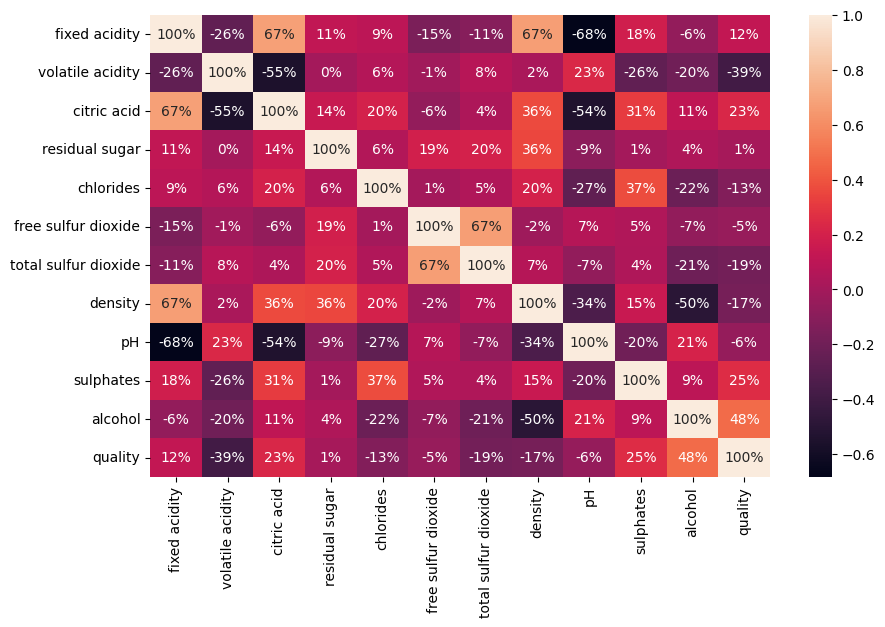

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

## 4. Selected the 3 most important attributes and build a linear correlation between those 3 attributes and the wine quality score

In [78]:
sampleX = df.loc[:, ["alcohol", "sulphates", "volatile acidity"]]
sampleY = df.quality.values

model = linear_model.LinearRegression()
model.fit(sampleX, sampleY)

prediction = model.predict(sampleX)

In [79]:
print(f"MSE: {metrics.mean_squared_error(prediction, sampleY)}")
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"\n=> General equation: quality = {model.coef_[0]} x alcohol + {model.coef_[1]} x sulphates + {model.coef_[2]} x citric acid + {model.intercept_}")

MSE: 0.43283592405329985
Coefficient: [ 0.30921776  0.67902824 -1.22140449]
Intercept: 2.610831674682538

=> General equation: quality = 0.30921776387560407 x alcohol + 0.679028238953012 x sulphates + -1.2214044857372144 x citric acid + 2.610831674682538
